In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Cardio_vascular.csv')

In [3]:
df=data.copy()

In [4]:
# rename columns
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [5]:
df.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
X=df.drop('heart_disease',axis=1)

In [7]:
Y=df['heart_disease']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scale=MinMaxScaler()

In [10]:
X_scaled=scale.fit_transform(X)

In [11]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=10)


# SVM algorithm

In [14]:
from sklearn.svm import SVC,SVR

In [15]:
# build the model

In [16]:
svc_model=SVC(C=1.0,kernel='poly')

In [17]:
svc_model.fit(x_train,y_train)

SVC(kernel='poly')

In [18]:
prediction=svc_model.predict(x_test)

In [19]:
#import the model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [20]:
accuracy_score(y_test,prediction)

0.9073170731707317

In [21]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        97
           1       0.90      0.93      0.91       108

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [22]:
confusion_matrix(y_test,prediction)

array([[ 86,  11],
       [  8, 100]])

# KNN algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=21, p=2,
    metric='minkowski')

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [26]:
y_predict=knn.predict(x_test)

In [27]:
accuracy_score(y_test,y_predict)

0.848780487804878

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        97
           1       0.87      0.84      0.85       108

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [29]:
confusion_matrix(y_test,y_predict)

array([[83, 14],
       [17, 91]])

Text(0, 0.5, 'calculate accuracy')

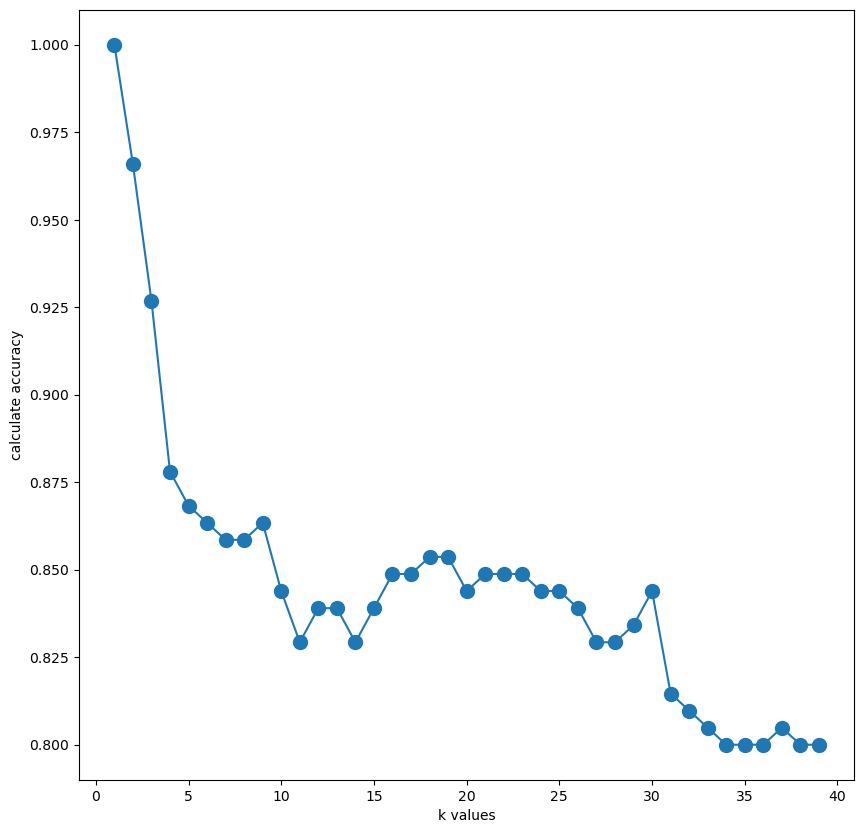

In [78]:
best_accuracy=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_predict=knn.predict(x_test)
    accuracy=accuracy_score(y_test,y_predict)
    best_accuracy.append(accuracy)
    
    
plt.figure(figsize=(10,10))
plt.plot(range(1,40),best_accuracy,marker='o',markersize=10)
plt.xlabel('k values')
plt.ylabel('calculate accuracy')

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [68]:
dt1=DecisionTreeClassifier(criterion='gini',class_weight='balanced')
dt1.fit(x_train,y_train)
prediction=dt1.predict(x_train)
accuracy_score(y_train,prediction)

1.0

In [69]:
print(classification_report(y_train,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       418

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [70]:
test_prediction=dt.predict(x_test)


In [71]:
accuracy_score(y_test,test_prediction)

0.7804878048780488

In [72]:
from sklearn import tree

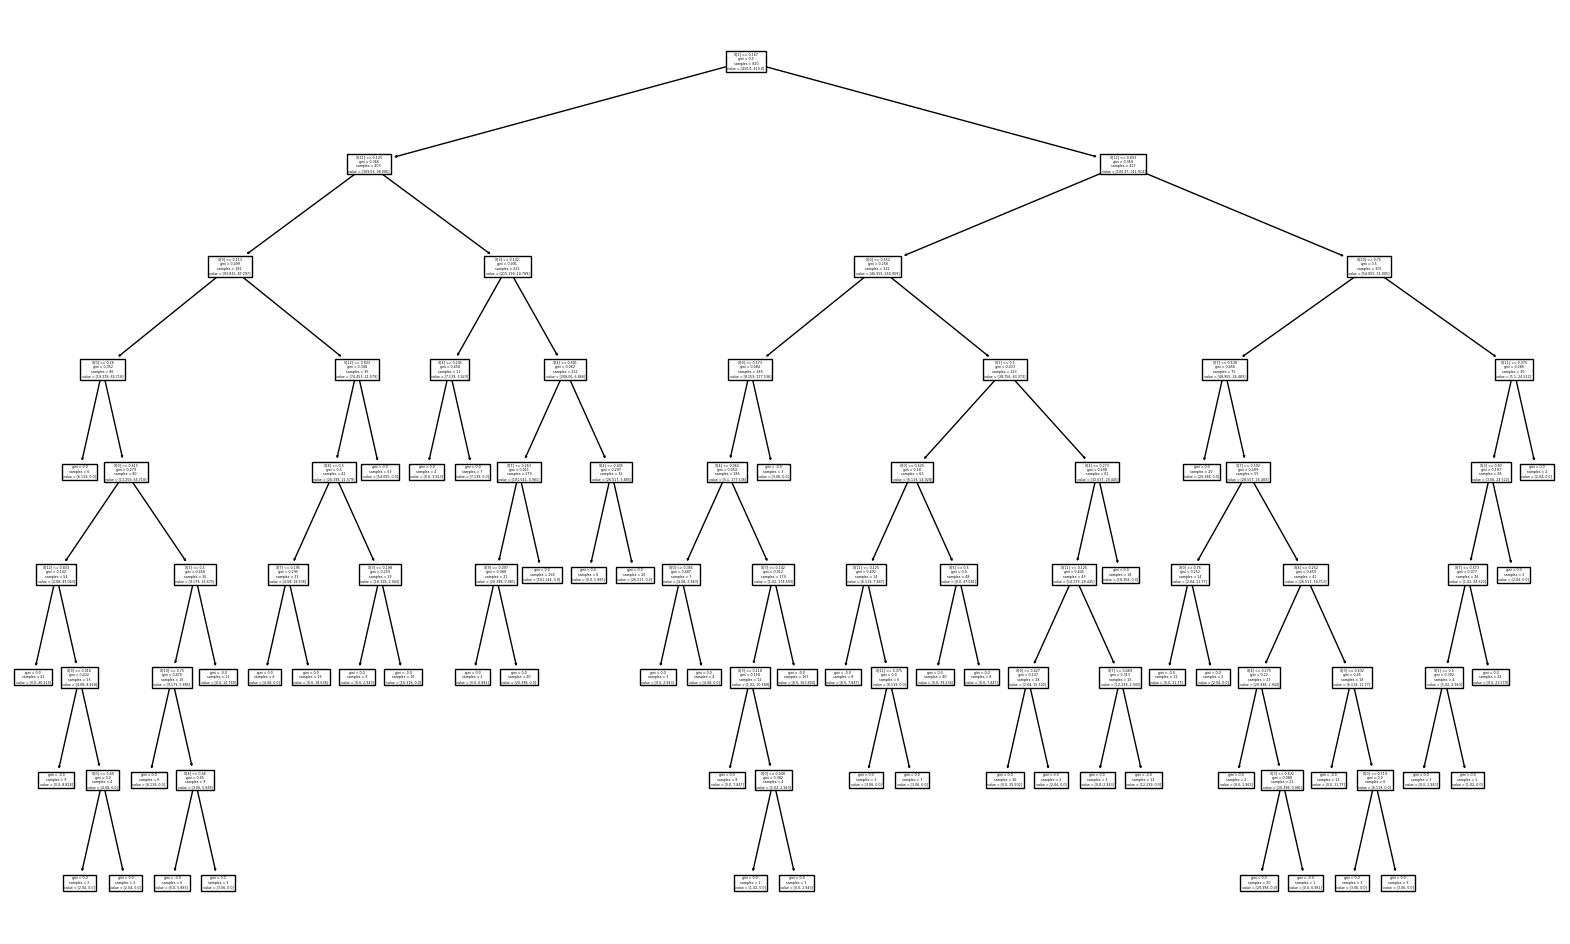

In [73]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt1)
plt.show()


In [74]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        97
           1       0.76      0.86      0.81       108

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



In [75]:
dt=DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=3)
dt.fit(x_train,y_train)
prediction=dt.predict(x_train)
accuracy_score(y_train,prediction)

0.8353658536585366

In [76]:
from sklearn import tree

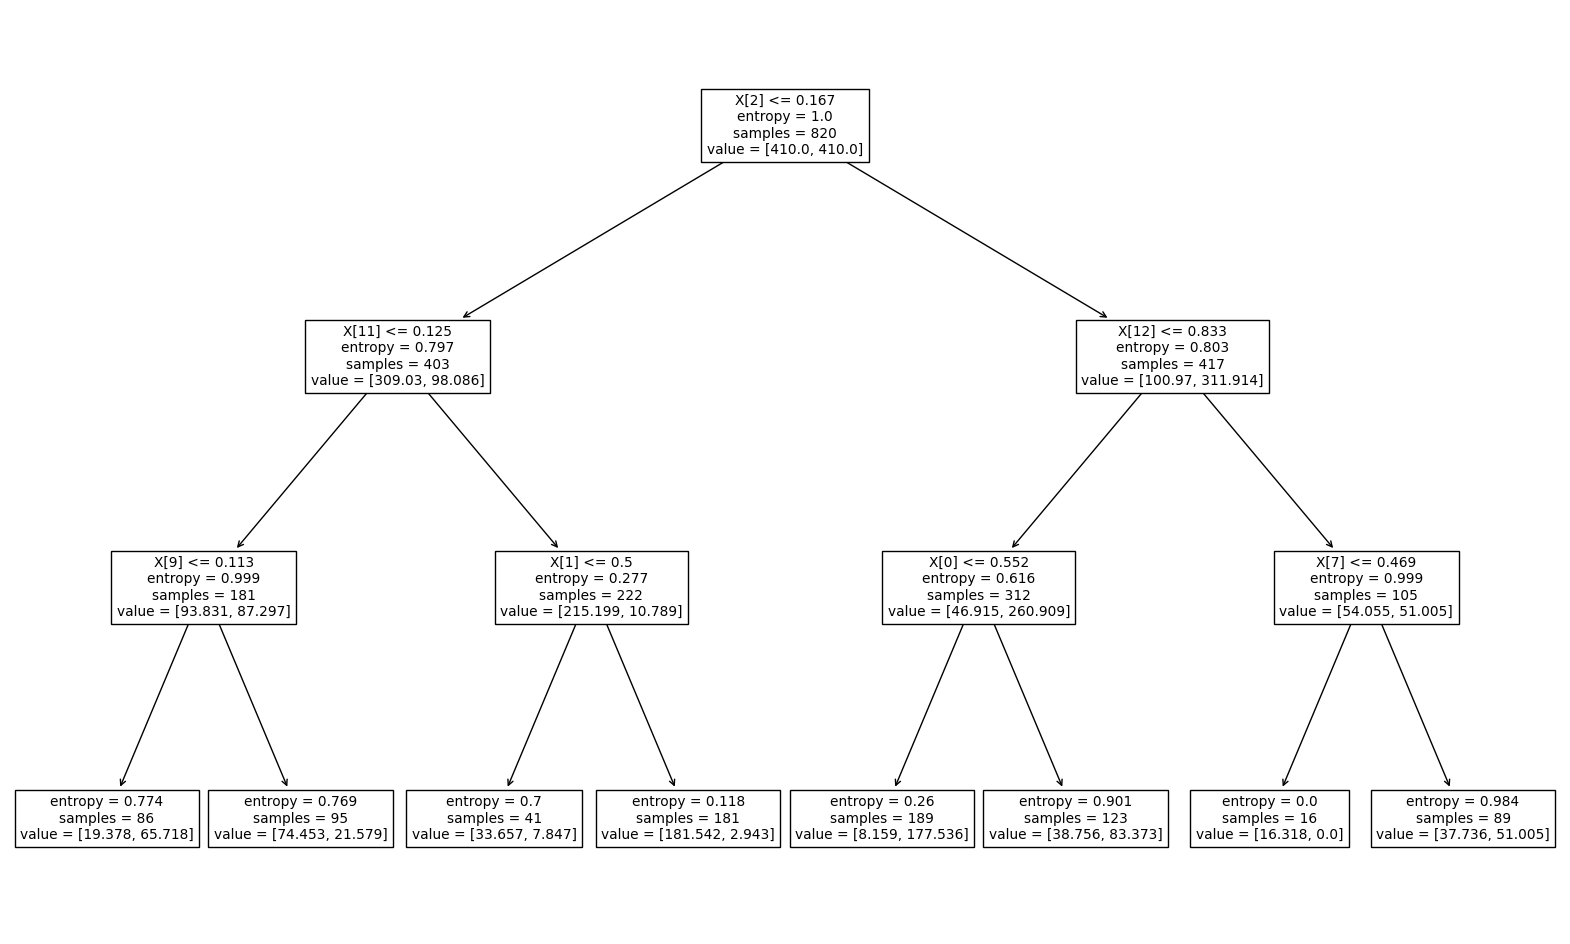

In [77]:
plt.figure(figsize=(20,12))
tree.plot_tree(dt)
plt.show()